Crops Yield Data:

After importing required libraries, crops yield of ten most consumed crops around the world was downloaded from FAO webiste.
The collected data include country, item, year starting from 1961 to 2016 and yield value.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:

df_yield=pd.read_csv('yield.csv')
df_yield.shape

(56717, 12)

In [ ]:
df_yield.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [ ]:
df_yield.tail()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
56712,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2012,2012,hg/ha,24420
56713,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2013,2013,hg/ha,22888
56714,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2014,2014,hg/ha,21357
56715,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2015,2015,hg/ha,19826
56716,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2016,2016,hg/ha,18294


Looking at the columns in the csv, we can rename Value to hg/ha_yield to make it easier to recognise that this is our crops yields production value. In addition to removal of unnecessary coloumns like Area Code, Domain, Item Code, etc.

In [ ]:
# rename columns.
df_yield = df_yield.rename(index=str, columns={"Value": "hg/ha_yield"})
df_yield.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,hg/ha_yield
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [ ]:
# drop unwanted columns.
df_yield = df_yield.drop(['Year Code','Element Code','Element','Year Code','Area Code','Domain Code','Domain','Unit','Item Code'], axis=1)
df_yield.head()

,Area,Item,Year,hg/ha_yield
0,Afghanistan,Maize,1961,14000
1,Afghanistan,Maize,1962,14000
2,Afghanistan,Maize,1963,14260
3,Afghanistan,Maize,1964,14257
4,Afghanistan,Maize,1965,14400


In [ ]:
df_yield.describe()

,Year,hg/ha_yield
count,56717.000000,56717.000000
mean,1989.669570,62094.660084
std,16.133198,67835.932856
min,1961.000000,0.000000
25%,1976.000000,15680.000000
50%,1991.000000,36744.000000
75%,2004.000000,86213.000000
max,2016.000000,1000000.000000


In [ ]:
df_yield.info()


<class 'pandas.core.frame.DataFrame'>
Index: 56717 entries, 0 to 56716
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Area         56717 non-null  object
 1   Item         56717 non-null  object
 2   Year         56717 non-null  int64 
 3   hg/ha_yield  56717 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [ ]:
# Make the data
df_train = pd.read_csv('train_features.csv',sep=',')
df_labels = pd.read_csv('train_labels.csv',sep=',')
df_test = pd.read_csv('dengue_features_test.csv', sep=',')
df_train['total_cases'] = df_labels['total_cases']


# Fill the missing data
df_train.fillna(method='ffill', inplace=True)
df_train = df_train.fillna(df_train.mean())

# create new datasets
df_sj = df_train[df_train['city'] == 'sj']
df_iq = df_train[df_train['city'] == 'iq']

print('San Juan shape:', df_sj.shape)
print('Iquitos shape:', df_iq.shape)

# create mean NVDI for each week for each city
df_sj['nvdi_mean'] = df_sj[df_sj.columns[3:7]].mean(axis = 1)
df_iq['nvdi_mean'] = df_iq[df_iq.columns[3:7]].mean(axis = 1)


San Juan shape: (936, 25)
Iquitos shape: (520, 25)


<ipython-input-55-bb5369f22583>:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train = df_train.fillna(df_train.mean())
<ipython-input-55-bb5369f22583>:20: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_sj['nvdi_mean'] = df_sj[df_sj.columns[3:7]].mean(axis = 1)
<ipython-input-55-bb5369f22583>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df

Climate Data : Rainfall
The climatic factors include rainfall and temperature. They are abiotic components, including pesticides and soil, of the environmental factors that influence plant growth and development.

Rainfall has a dramatic effect on agriculture. For this project rain fall per year information was gathered from World Data Bank.

In [ ]:
df_rain = pd.read_csv('rainfall.csv')
df_rain.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [ ]:
df_rain = df_rain.rename(index=str, columns={" Area": 'Area'})

In [ ]:
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area                           6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 210.2+ KB


In [ ]:
# convert average_rain_fall_mm_per_year from object to float
df_rain['average_rain_fall_mm_per_year'] = pd.to_numeric(df_rain['average_rain_fall_mm_per_year'],errors = 'coerce')
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           6727 non-null   object 
 1   Year                           6727 non-null   int64  
 2   average_rain_fall_mm_per_year  5947 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 210.2+ KB


Next, droping any empty rows from dataset and merge yield dataframe with rain dataframe by year and area columns

In [ ]:
df_rain = df_rain.dropna()

In [ ]:
df_rain.describe()

,Year,average_rain_fall_mm_per_year
count,5947.000000,5947.000000
mean,2001.365899,1124.743232
std,9.526335,786.257365
min,1985.000000,51.000000
25%,1993.000000,534.000000
50%,2001.000000,1010.000000
75%,2010.000000,1651.000000
max,2017.000000,3240.000000


The rainfall dataframe begins at 1985 and ends at 2016.

In [ ]:
# merge yield dataframe with rain dataframe by year and area columns
yield_df = pd.merge(df_yield, df_rain, on=['Year','Area'])

Now, we view the final shape of the dataframe and info of values:

In [ ]:
yield_df.shape

(25385, 5)

In [ ]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year
0,Afghanistan,Maize,1985,16652,327.0
1,Afghanistan,Potatoes,1985,140909,327.0
2,Afghanistan,"Rice, paddy",1985,22482,327.0
3,Afghanistan,Wheat,1985,12277,327.0
4,Afghanistan,Maize,1986,16875,327.0


We can see that now the years start from the first yield dataframe the starting year was 1961, now it's 1985 because that's when the rainfall data begins.

In [ ]:
yield_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year
count,25385.000000,25385.000000,25385.000000
mean,2001.278787,68312.278353,1254.849754
std,9.143915,75213.292733,804.449430
min,1985.000000,50.000000,51.000000
25%,1994.000000,17432.000000,630.000000
50%,2001.000000,38750.000000,1150.000000
75%,2009.000000,94286.000000,1761.000000
max,2016.000000,554855.000000,3240.000000


**Pesticides Data:**


In [ ]:
df_pes = pd.read_csv('pesticides.csv')
df_pes.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [ ]:
df_pes = df_pes.rename(index=str, columns={"Value": "pesticides_tonnes"})
df_pes = df_pes.drop(['Element','Domain','Unit','Item'], axis=1)
df_pes.head()

,Area,Year,pesticides_tonnes
0,Albania,1990,121.0
1,Albania,1991,121.0
2,Albania,1992,121.0
3,Albania,1993,121.0
4,Albania,1994,201.0


In [ ]:
df_pes.describe()

,Year,pesticides_tonnes
count,4349.000000,4.349000e+03
mean,2003.138883,2.030334e+04
std,7.728044,1.177362e+05
min,1990.000000,0.000000e+00
25%,1996.000000,9.300000e+01
50%,2003.000000,1.137560e+03
75%,2010.000000,7.869000e+03
max,2016.000000,1.807000e+06


In [ ]:
df_pes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4349 entries, 0 to 4348
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               4349 non-null   object 
 1   Year               4349 non-null   int64  
 2   pesticides_tonnes  4349 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 135.9+ KB


In [ ]:
# merge Pesticides dataframe with yield dataframe
yield_df = pd.merge(yield_df, df_pes, on=['Year','Area'])
yield_df.shape

(18949, 6)

In [ ]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes
0,Albania,Maize,1990,36613,1485.0,121.0
1,Albania,Potatoes,1990,66667,1485.0,121.0
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0
3,Albania,Sorghum,1990,12500,1485.0,121.0
4,Albania,Soybeans,1990,7000,1485.0,121.0


**Average Temprature:**

In [ ]:
avg_temp=  pd.read_csv('temp.csv')

In [ ]:
avg_temp.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [ ]:
avg_temp.describe()

,year,avg_temp
count,71311.000000,68764.000000
mean,1905.799007,16.183876
std,67.102099,7.592960
min,1743.000000,-14.350000
25%,1858.000000,9.750000
50%,1910.000000,16.140000
75%,1962.000000,23.762500
max,2013.000000,30.730000


So average temprature starts from 1743 and ends at 2013, with some empty rows that we have to drop.

In [ ]:
avg_temp = avg_temp.rename(index=str, columns={"year": "Year", "country":'Area'})
avg_temp.head()

,Year,Area,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [ ]:
yield_df = pd.merge(yield_df,avg_temp, on=['Area','Year'])
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [ ]:
yield_df.shape

(28242, 7)

In [ ]:
yield_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [ ]:
yield_df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

**Data Exploration**

yield_df is the final obtained dataframe;

In [ ]:
yield_df.groupby('Item').count()

,Area,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Item,,,,,,
Cassava,2045,2045,2045,2045,2045,2045
Maize,4121,4121,4121,4121,4121,4121
Plantains and others,556,556,556,556,556,556
Potatoes,4276,4276,4276,4276,4276,4276
"Rice, paddy",3388,3388,3388,3388,3388,3388
Sorghum,3039,3039,3039,3039,3039,3039
Soybeans,3223,3223,3223,3223,3223,3223
Sweet potatoes,2890,2890,2890,2890,2890,2890
Wheat,3857,3857,3857,3857,3857,3857


In [ ]:
yield_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


It can be noticed the high variance in the values for each columns, later on I'll account for that will scaling.

In [ ]:
yield_df['Area'].nunique()

101

The dataframe has 101 Countries, ordering these by 10 the highest yield production:

In [ ]:
yield_df.groupby(['Area'],sort=True)['hg/ha_yield'].sum().nlargest(10)

Area
India             327420324
Brazil            167550306
Mexico            130788528
Japan             124470912
Australia         109111062
Pakistan           73897434
Indonesia          69193506
United Kingdom     55419990
Turkey             52263950
Spain              46773540
Name: hg/ha_yield, dtype: int64

India has the highest yield production in the dataset. Inclusing items in the groupby:

In [ ]:
yield_df.groupby(['Item','Area'],sort=True)['hg/ha_yield'].sum().nlargest(10)

Item            Area          
Cassava         India             142810624
Potatoes        India              92122514
                Brazil             49602168
                United Kingdom     46705145
                Australia          45670386
Sweet potatoes  India              44439538
Potatoes        Japan              42918726
                Mexico             42053880
Sweet potatoes  Mexico             35808592
                Australia          35550294
Name: hg/ha_yield, dtype: int64

India is the highest for production of cassava and potatoes. Potatoes seems to be the dominated crop in the dataset, being the highest in 4 countries.

The final dataframe starts from 1990 and ends in 2013, that's 23 years worth of data for 101 countries.

Now, exploring the relationships between the colunms of the dataframe, a good way to quickly check correlations among columns is by visualizing the correlation matrix as a heatmap.

In [ ]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-86-7180a84c6ce3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = yield_df.corr() #caculation of correlation


Text(0.5, 1.0, 'Correlation Heatmap')

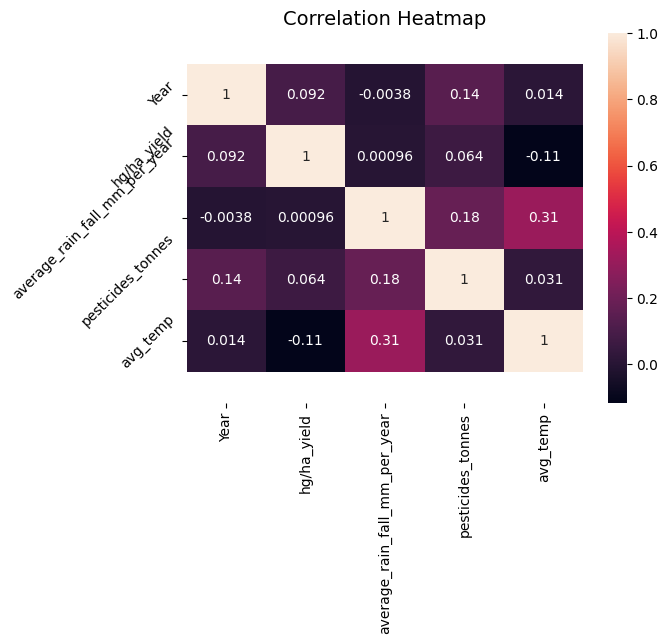

In [ ]:
#checking the correlation matrix, to know that how columns are corelated
df_corr = yield_df.corr() #caculation of correlation
ax = sns.heatmap(df_corr, annot=True) #plot in a heatmap
bottom, top = ax.get_ylim() #limit set up
ax.set_ylim(bottom + 0.5, top - 0.5) #setting up limit for better visualization
ax.set_yticklabels(ax.get_yticklabels(),rotation=45,horizontalalignment='right')#changing y columns labels direction
ax.set_title('Correlation Heatmap',fontsize = 14)#adding title for the plot

It can be seen from the above correlation map that there is no correlation between any of the colmuns in the dataframe.

In [ ]:
# Make the data
df_train = pd.read_csv('train_features.csv',sep=',')
df_labels = pd.read_csv('train_labels.csv',sep=',')
df_test = pd.read_csv('dengue_features_test.csv', sep=',')
df_train['total_cases'] = df_labels['total_cases']


print(df_labels.head(5))
print(df_labels.columns)


  city  year  weekofyear  total_cases
0   sj  1990          18            4
1   sj  1990          19            5
2   sj  1990          20            4
3   sj  1990          21            3
4   sj  1990          22            6
Index(['city', 'year', 'weekofyear', 'total_cases'], dtype='object')


In [ ]:
df_labels.rename(columns={"total_cases": "Yield"}, inplace=True)

In [ ]:

df_labels.index = pd.DatetimeIndex(df_train.week_start_date)
# print(df_labels.head())
# Get cases as separately
sj_cases = df_labels[df_labels['city'] == 'sj']
iq_cases = df_labels[df_labels['city'] == 'iq']

# The 'MS' string groups the data in buckets by start of the month
df_labels = df_labels['Yield'].resample('MS').sum()
sj_cases = sj_cases['Yield'].resample('MS').sum()
iq_cases = iq_cases['Yield'].resample('MS').sum()
# The term bfill means that we use the value before filling in missing values
df_labels = df_labels.fillna(df_labels.bfill())
sj_cases = sj_cases.fillna(sj_cases.bfill())
iq_cases = iq_cases.fillna(iq_cases.bfill())

print(df_labels.head(5))
print(sj_cases.head(5))
print(iq_cases.head(5))

week_start_date
1990-04-01     4
1990-05-01    18
1990-06-01    21
1990-07-01    39
1990-08-01    85
Freq: MS, Name: Yield, dtype: int64
week_start_date
1990-04-01     4
1990-05-01    18
1990-06-01    21
1990-07-01    39
1990-08-01    85
Freq: MS, Name: Yield, dtype: int64
week_start_date
2000-07-01    0
2000-08-01    0
2000-09-01    1
2000-10-01    2
2000-11-01    0
Freq: MS, Name: Yield, dtype: int64


In [ ]:
import statsmodels.api as sm

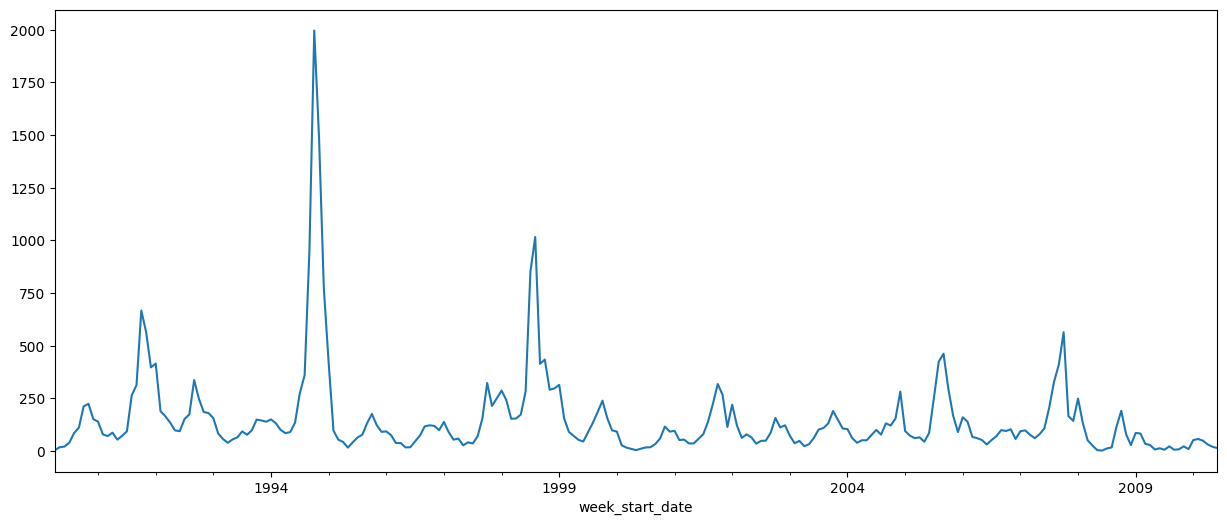

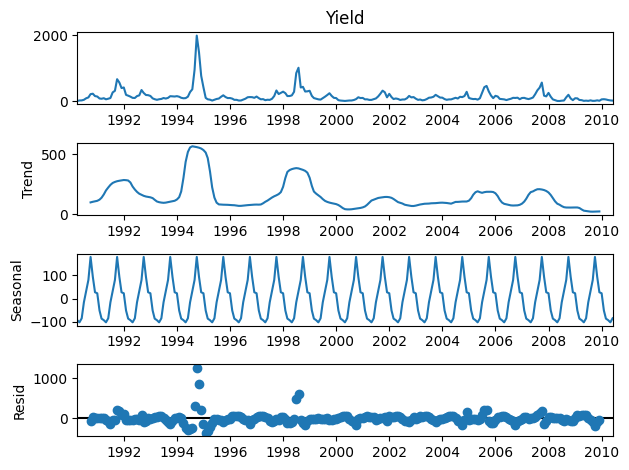

In [ ]:
df_labels.plot(figsize=(15, 6))
plt.show()

decomposition = sm.tsa.seasonal_decompose(df_labels, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
pesticides_raw_df = pd.read_csv('/content/pesticides.csv')
rainfall_raw_df = pd.read_excel('/content/AllIndiaRainfall.xlsx')
temp_raw_df = pd.read_csv('/content/temp.csv')
yield_raw_df = pd.read_csv('/content/yield.csv')

In [ ]:
food_security_raw_df = pd.read_csv('/content/FAOSTAT_Food-Security.csv')

In [ ]:
yield_df = yield_raw_df[
        yield_raw_df.Area == 'India'
    ][
        yield_raw_df.Item == 'Wheat'
    ][
        ['Year', 'Value']
    ].rename(
        columns={'Value': 'Yield'}
    ).set_index(
        'Year'
    )
yield_df.head()

pesticides_df = pesticides_raw_df[
        pesticides_raw_df.Area == 'India'
    ][
        ['Year', 'Value']
    ].rename(
        columns={'Value': 'Pesticides'}
    ).set_index(
        'Year'
    )
pesticides_df.head()

temp_df = temp_raw_df[
        temp_raw_df.country == 'India'
    ][
        ['year', 'avg_temp']
    ].rename(
        columns={'year': 'Year', 'avg_temp': 'Temp'}
)
temp_df = temp_df.reset_index(drop=True)
temp_df = temp_df.set_index('Year')
temp_df.index.name = 'Year'
temp_df = temp_df.groupby('Year').agg('max')

rainfall_raw_df = rainfall_raw_df.rename(columns={'year': 'Year', 'ANN': 'Rainfall'})
rainfall_df = rainfall_raw_df[
        ['Year', 'Rainfall']
    ].set_index(
        'Year'
    )
rainfall_df['Rainfall'] = rainfall_df['Rainfall'].astype(str).astype(float)
rainfall_df.head()

yield_all_df = pd.merge(
    pd.merge(
        pd.merge(
            yield_df,
            pesticides_df,
            on='Year',
            how='left'
        ),
        temp_df,
        on='Year',
        how='left'
    ),
    rainfall_df,
    on='Year',
    how='left'
)
yield_all_df

,Yield,Pesticides,Temp,Rainfall
Year,,,,
1961,8507,NaN,27.04,13139.0
1962,8896,NaN,26.73,10625.0
1963,7929,NaN,27.10,10956.0
1964,7299,NaN,27.20,11123.0
1965,9132,NaN,27.21,8719.0
1966,8268,NaN,27.46,9701.0
1967,8874,NaN,27.01,10853.0
1968,11028,NaN,26.90,9614.0
1969,11688,NaN,27.34,10446.0


In [ ]:
yield_df = yield_raw_df[
        yield_raw_df.Area == 'India'
    ][
        yield_raw_df.Item == 'Wheat'
    ][
        ['Year', 'Value']
    ].rename(
        columns={'Value': 'Yield'}
    ).set_index(
        'Year'
    )
yield_df.head()

pesticides_df = pesticides_raw_df[
        pesticides_raw_df.Area == 'India'
    ][
        ['Year', 'Value']
    ].rename(
        columns={'Value': 'Pesticides'}
    ).set_index(
        'Year'
    )
pesticides_df.head()

temp_df = temp_raw_df[
        temp_raw_df.country == 'India'
    ][
        ['year', 'avg_temp']
    ].rename(
        columns={'year': 'Year', 'avg_temp': 'Temp'}
)
temp_df = temp_df.reset_index(drop=True)
temp_df = temp_df.set_index('Year')
temp_df.index.name = 'Year'
temp_df = temp_df.groupby('Year').agg('max')

rainfall_raw_df = rainfall_raw_df.rename(columns={'year': 'Year', 'ANN': 'Rainfall'})
rainfall_df = rainfall_raw_df[
        ['Year', 'Rainfall']
    ].set_index(
        'Year'
    )
rainfall_df['Rainfall'] = rainfall_df['Rainfall'].astype(str).astype(float)
rainfall_df.head()

yield_all_df = pd.merge(
    pd.merge(
        pd.merge(
            yield_df,
            pesticides_df,
            on='Year',
            how='left'
        ),
        temp_df,
        on='Year',
        how='left'
    ),
    rainfall_df,
    on='Year',
    how='left'
)
yield_all_df

,Yield,Pesticides,Temp,Rainfall
Year,,,,
1961,8507,NaN,27.04,13139.0
1962,8896,NaN,26.73,10625.0
1963,7929,NaN,27.10,10956.0
1964,7299,NaN,27.20,11123.0
1965,9132,NaN,27.21,8719.0
1966,8268,NaN,27.46,9701.0
1967,8874,NaN,27.01,10853.0
1968,11028,NaN,26.90,9614.0
1969,11688,NaN,27.34,10446.0


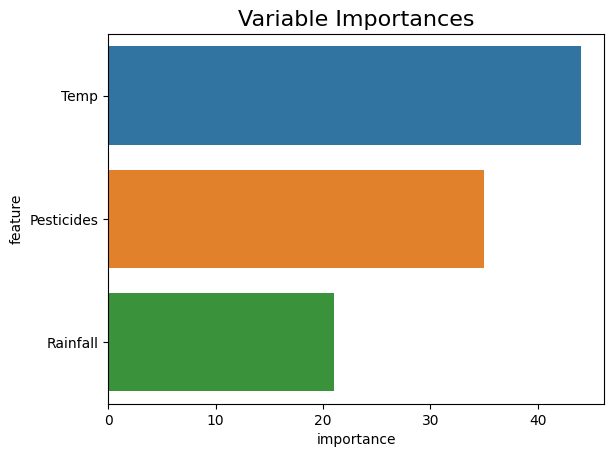

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error

X = yield_all_df.drop('Yield', axis=1)
y = yield_all_df['Yield']

# Take last 5 years as validation.
X_train, X_test = X.iloc[:-5,:], X.iloc[-5:,:]
y_train, y_test = y.iloc[:-5], y.iloc[-5:]

# Create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

mae = np.round(mean_absolute_error(y_test, predictions), 3)


# Plot variable importances of the model.
plt.title('Variable Importances', fontsize=16)
sns.barplot(x=df_importances.importance, y=df_importances.feature, orient='h')
plt.show()

<Axes: xlabel='Year'>

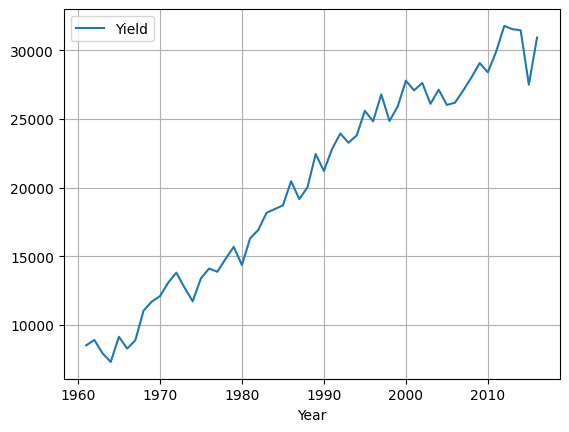

In [ ]:
yield_all_df.plot.line(y='Yield', grid=True)

<Axes: xlabel='Year'>

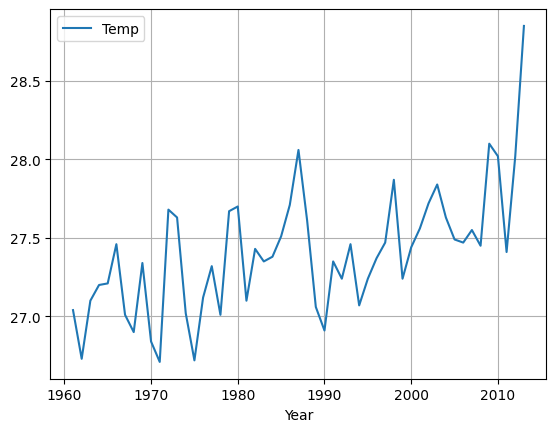

In [ ]:
yield_all_df.plot.line(y='Temp', grid=True)

<Axes: xlabel='Year'>

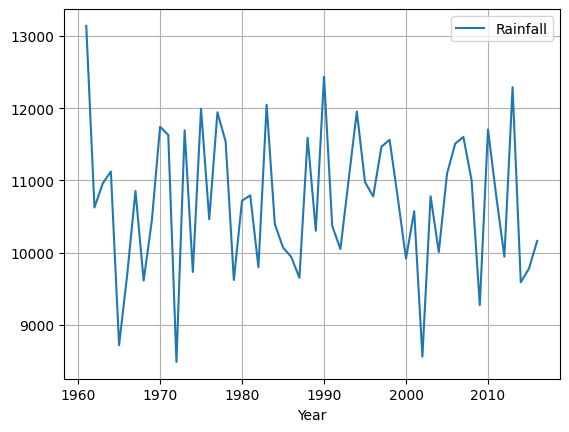

In [ ]:
yield_all_df.plot.line(y='Rainfall', grid=True)

<Axes: xlabel='Year'>

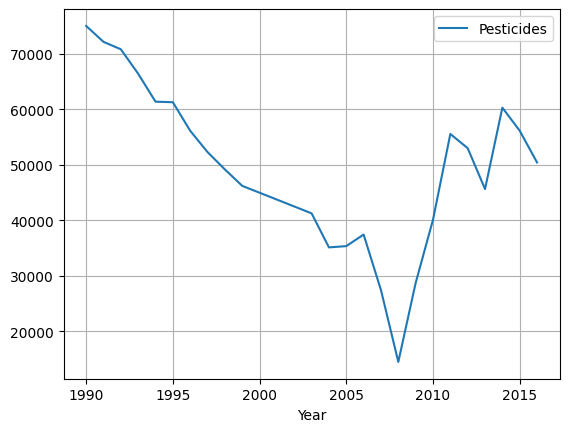

In [ ]:
yield_all_df.plot.line(y='Pesticides', grid=True)

**Data Preprocessing**

In [ ]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


**Encoding Categorical Variables:**

There are two categorical columns in the dataframe, categorical data are variables that contain label values rather than numeric values. The number of possible values is often limited to a fixed set, like in this case, items and countries values. Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.

This means that categorical data must be converted to a numerical form. One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. For that purpose, One-Hot Encoding will be used to convert these two columns to one-hot numeric array.

The categorical value represents the numerical value of the entry in the dataset. This encoding will create a binary column for each category and returns a matrix with the results.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
yield_df_onehot = pd.get_dummies(yield_df, columns=['Area',"Item"], prefix = ['Country',"Item"])
features=yield_df_onehot.loc[:, yield_df_onehot.columns != 'hg/ha_yield']
label=yield_df['hg/ha_yield']
features.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
features = features.drop(['Year'], axis=1)

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28242 entries, 0 to 28241
Columns: 114 entries, average_rain_fall_mm_per_year to Item_Yams
dtypes: float64(3), uint8(111)
memory usage: 3.9 MB


In [ ]:
features.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1485.0,121.0,16.37,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1485.0,121.0,16.37,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1485.0,121.0,16.37,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1485.0,121.0,16.37,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1485.0,121.0,16.37,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


**Scaling Features:**

Taking a look at the dataset above, it contains features highly varying in magnitudes, units and range. The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes.

To supress this effect, we need to bring all features to the same level of magnitudes. This can be acheived by scaling.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
features=scaler.fit_transform(features)

After dropping year column in addition to scaling all values in features, the resulting array will look something like this :

In [ ]:
features

array([[4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [ ]:
from sklearn.model_selection import train_test_split
#train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = 0.3, random_state = 42)

In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
import xgboost as xgb

In [ ]:
xgb_classifier = xgb.XGBClassifier()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# create a random forest regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# train the model on the training data
rf_model.fit(X_train, y_train)

# make predictions on the test data
y_pred1 = rf_model.predict(X_test)

# calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred1)

# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred1)

# calculate the R2 score
r2 = r2_score(y_test, y_pred1)

# print the results
print("Mean Absolute Error: {:.2f}".format(mae))
print("Mean Squared Error: {:.2f}".format(mse))
print("R2 Score: {:.2f}".format(r2))


Mean Absolute Error: 5712.82
Mean Squared Error: 196363250.83
R2 Score: 0.97


Text(0.5, 1.0, 'Random Forest (Observed vs Predicted) Plot')

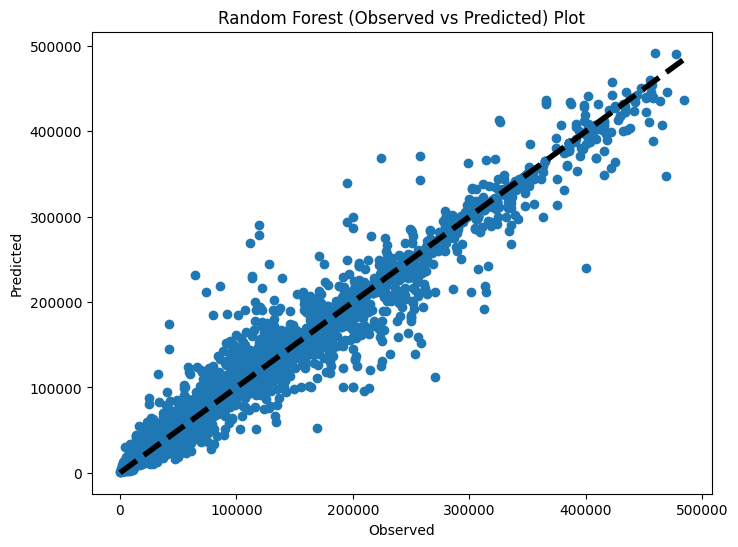

In [ ]:
# Actual vs predicted plot, In this part I have plotted actual points and predicted points to visualize the accuracy of both the models
fig, ax1 = plt.subplots(figsize=(8, 6))
#for linear regression
ax1.scatter(y_test, y_pred1) #plotting a scatter plot
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4) # creating regressor line
ax1.set_xlabel('Observed') #setting label for x axis
ax1.set_ylabel('Predicted') #setting label for y axis
ax1.set_title('Random Forest (Observed vs Predicted) Plot') #setting title



In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train the gradient boosting regressor model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

# Make predictions on the testing set
y_pred2 = gbr.predict(X_test)

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred2)
print("Mean Absolute Error (MAE): {:.2f}".format(mae))

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred2)
print("Mean Squared Error (MSE): {:.2f}".format(mse))

# Calculate the R-squared score (R2)
r2 = r2_score(y_test, y_pred2)
print("R-squared score (R2): {:.2f}".format(r2))


Mean Absolute Error (MAE): 20292.34
Mean Squared Error (MSE): 991209663.16
R-squared score (R2): 0.87


Text(0.5, 1.0, 'Gradient Boosting (Observed vs Predicted) Plot')

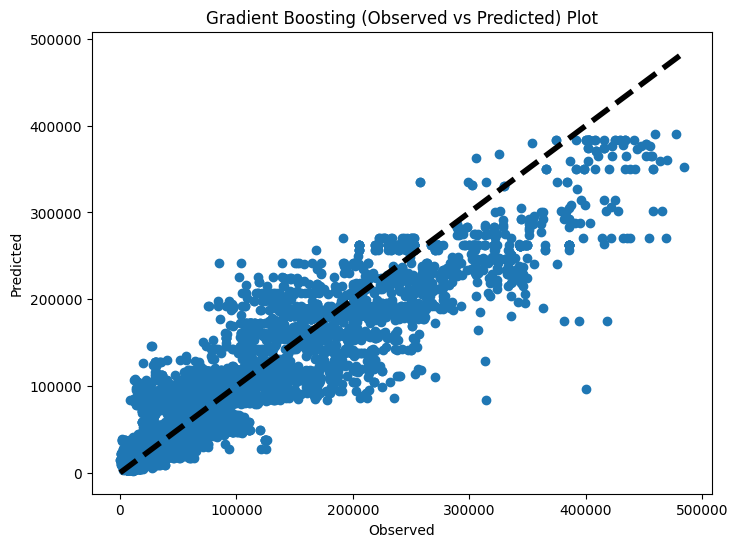

In [ ]:
# Actual vs predicted plot, In this part I have plotted actual points and predicted points to visualize the accuracy of both the models
fig, ax1 = plt.subplots(figsize=(8, 6))
#for linear regression
ax1.scatter(y_test, y_pred2) #plotting a scatter plot
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4) # creating regressor line
ax1.set_xlabel('Observed') #setting label for x axis
ax1.set_ylabel('Predicted') #setting label for y axis
ax1.set_title('Gradient Boosting (Observed vs Predicted) Plot') #setting title


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Train an XGBoost regressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred3 = xgb.predict(X_test)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred3)
print("Mean Absolute Error:", mae)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred3)
print("Mean Squared Error:", mse)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred3)
print("R-squared Score:", r2)


Mean Absolute Error: 20283.22944060152
Mean Squared Error: 998146199.0437533
R-squared Score: 0.8653364305531843


Text(0.5, 1.0, 'XG Regressor (Observed vs Predicted) Plot')

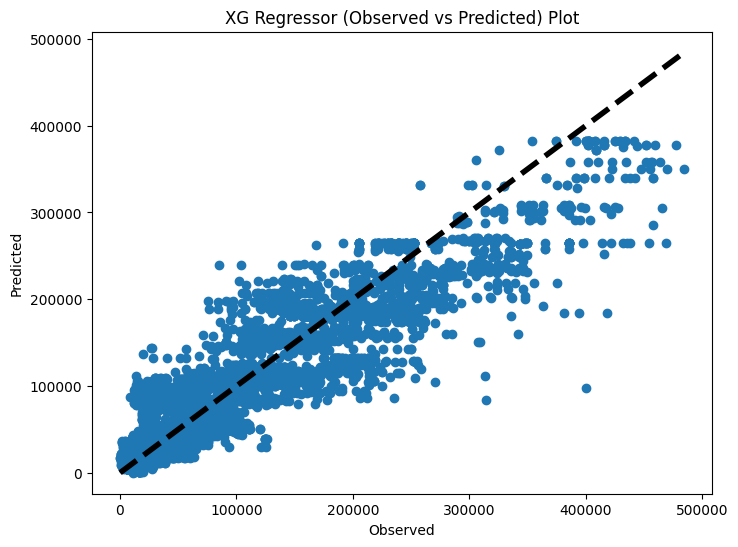

In [ ]:
# Actual vs predicted plot, In this part I have plotted actual points and predicted points to visualize the accuracy of both the models
fig, ax1 = plt.subplots(figsize=(8, 6))
#for linear regression
ax1.scatter(y_test, y_pred3) #plotting a scatter plot
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4) # creating regressor line
ax1.set_xlabel('Observed') #setting label for x axis
ax1.set_ylabel('Predicted') #setting label for y axis
ax1.set_title('XG Regressor (Observed vs Predicted) Plot') #setting title


Text(0.5, 1.0, 'Random Forest (Observed vs Predicted) Plot')

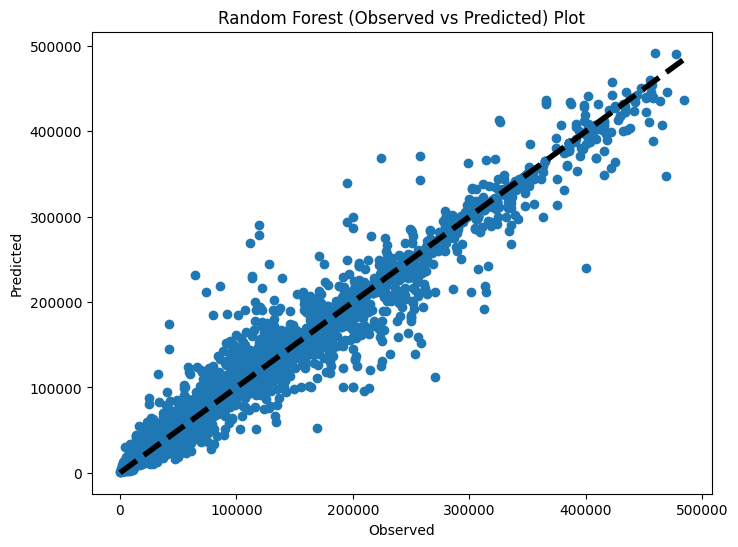

In [ ]:
# Actual vs predicted plot, In this part I have plotted actual points and predicted points to visualize the accuracy of both the models
fig, ax1 = plt.subplots(figsize=(8, 6))
#for linear regression
ax1.scatter(y_test, y_pred1) #plotting a scatter plot
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4) # creating regressor line
ax1.set_xlabel('Observed') #setting label for x axis
ax1.set_ylabel('Predicted') #setting label for y axis
ax1.set_title('Random Forest (Observed vs Predicted) Plot') #setting title


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Train the decision tree regressor model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Make predictions on the testing set
y_pred4 = dt.predict(X_test)

# Calculate the MAE, MSE, and R-squared score
mae = mean_absolute_error(y_test, y_pred4)
mse = mean_squared_error(y_test, y_pred4)
r2 = r2_score(y_test, y_pred4)

# Print the results
print("Mean Absolute Error (MAE): {:.2f}".format(mae))
print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("R-squared score: {:.2f}".format(r2))


Mean Absolute Error (MAE): 6126.37
Mean Squared Error (MSE): 299539281.08
R-squared score: 0.96


Text(0.5, 1.0, 'Decision Tree (Observed vs Predicted) Plot')

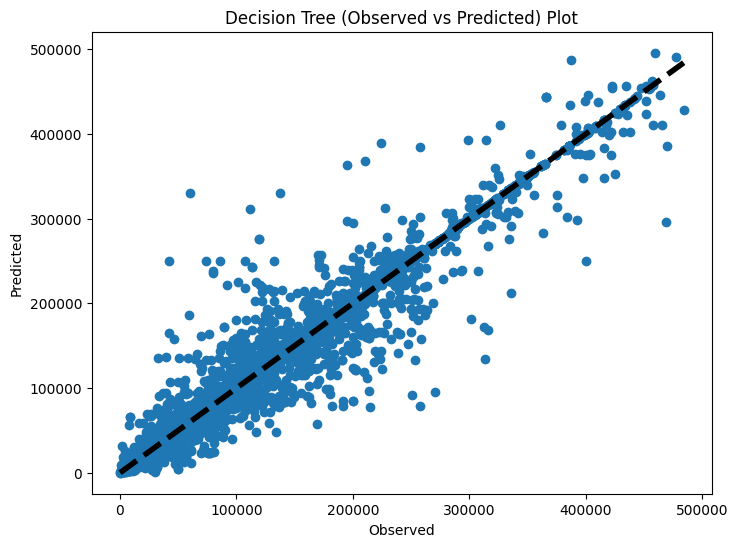

In [ ]:
# Actual vs predicted plot, In this part I have plotted actual points and predicted points to visualize the accuracy of both the models
fig, ax1 = plt.subplots(figsize=(8, 6))
#for linear regression
ax1.scatter(y_test, y_pred4) #plotting a scatter plot
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4) # creating regressor line
ax1.set_xlabel('Observed') #setting label for x axis
ax1.set_ylabel('Predicted') #setting label for y axis
ax1.set_title('Decision Tree (Observed vs Predicted) Plot') #setting title


In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from statsmodels.tools import eval_measures
import statsmodels.formula.api as smf

from sklearn.impute import SimpleImputer

from warnings import filterwarnings
filterwarnings('ignore')


t_features = pd.read_csv('train_features.csv', index_col=[0,1,2])
t_labels = pd.read_csv('train_labels.csv', index_col=[0,1,2])

print(t_labels.groupby('city').count())
# print(t_labels.head())

      total_cases
city             
iq            520
sj            936


In [ ]:
features = ['reanalysis_specific_humidity_g_per_kg',
                 'reanalysis_dew_point_temp_k',
                 'station_avg_temp_c',
                'station_min_temp_c',
            'precipitation_amt_mm']





def separate_and_engineer(city, data, selected_features, labels, mv1, mv2, mv3, mv4):

    data['week_start_date'] = pd.to_datetime(data['week_start_date'])
    for i in range(1,5):
        data['quarter_' + str(i)] = data['week_start_date'].apply(lambda date: 1 if (
            ((i-1)*3<date.to_pydatetime().month) and (date.to_pydatetime().month <= i * 3)) else 0)
        selected_features.append('quarter_' + str(i))

    city_train_features = data.loc[city]
    selected_features = list(set(selected_features))

    city_train_features = city_train_features.select_dtypes(include=[np.number])
    city_train_features = city_train_features[selected_features]

    city_train_features['station_avg_temp_c_mv_avg'] = city_train_features['station_avg_temp_c'].rolling(window=mv1).mean()

    city_train_features['precipitation_amt_mm_mv_avg'] = city_train_features['precipitation_amt_mm'].rolling(window=mv2).mean()

    city_train_features['reanalysis_specific_humidity_g_per_kg_mv_avg'] = city_train_features['reanalysis_specific_humidity_g_per_kg'].rolling(window=mv3).mean()
    city_train_features['reanalysis_dew_point_temp_k_mv_avg'] = city_train_features['reanalysis_dew_point_temp_k'].rolling(window=mv4).mean()


    city_train_features = city_train_features.fillna(city_train_features.mean())

    if (type(labels) != type(None)):
        city_train_labels = labels.loc[city]
        city_train_labels = city_train_labels.fillna(city_train_labels.mean())

        return pd.concat([city_train_features, city_train_labels], axis=1)

    return city_train_features

In [ ]:
def get_best_model(train, test):
    # Step 1: specify the form of the model
    model_formula = " + ".join(["total_cases ~ 1",
    "station_avg_temp_c_mv_avg",
    "precipitation_amt_mm_mv_avg",
    "reanalysis_specific_humidity_g_per_kg",
    "reanalysis_dew_point_temp_k",
    "precipitation_amt_mm",
    "station_min_temp_c",
    "station_avg_temp_c",
    "reanalysis_specific_humidity_g_per_kg_mv_avg",
    "reanalysis_dew_point_temp_k_mv_avg",
                               "quarter_1",
                               "quarter_2",
                               "quarter_3",
                               "quarter_4"])

    grid = 10 ** np.arange(-8, -3, dtype=np.float64)

    best_alpha = []
    best_score = 1000

    # Step 2: Find the best hyper parameter, alpha
    for alpha in grid:
        model = smf.glm(formula=model_formula,
                        data=train,
                        family=sm.families.NegativeBinomial(alpha=alpha))

        results = model.fit()
        predictions = results.predict(test).astype(int)
        score = eval_measures.meanabs(predictions, test.total_cases)

        if score < best_score:
            best_alpha = alpha
            best_score = score

#     print('best alpha = ', best_alpha)
#     print('best score = ', best_score)

    # Step 3: refit on entire dataset
    full_dataset = pd.concat([train, test])
    model = smf.glm(formula=model_formula,
                    data=full_dataset,
                    family=sm.families.NegativeBinomial(alpha=best_alpha))

    fitted_model = model.fit()
    return fitted_model, best_score

In [ ]:
# sj_cols_with_missing_values = [col for col in sj_X_train.columns if sj_X_train[col].isnull().any()]

sj_best_final_model = None
iq_best_final_model = None

sj_best_final_score = 1000
iq_best_final_score = 1000

sj_i_j = None
iq_i_j = None


# for i in range(2, 40):
#     for j in range(2, 40):
sj_train = separate_and_engineer('sj', t_features, features, t_labels, 22, 39, 27, 18)
iq_train = separate_and_engineer('iq', t_features, features, t_labels, 34, 33, 2, 2)

sj_train_subtrain = sj_train.head(800)
sj_train_subtest = sj_train.tail(sj_train.shape[0] - 800)

iq_train_subtrain = iq_train.head(450)
iq_train_subtest = iq_train.tail(iq_train.shape[0] - 450)

# print("SJ:\n\n")
# print("IQ:\n\n", iq_train.head())

sj_best_model, sj_best_score = get_best_model(sj_train_subtrain, sj_train_subtest)
iq_best_model, iq_best_score = get_best_model(iq_train_subtrain, iq_train_subtest)

if sj_best_score < sj_best_final_score:
    sj_best_final_score = sj_best_score
    sj_best_final_model = sj_best_model
# #     sj_i_j = [i,j]

if iq_best_score < iq_best_final_score:
    iq_best_final_score = iq_best_score
    iq_best_final_model = iq_best_model
# #     iq_i_j = [i,j]


print("Best MAE (SJ):")
print(sj_best_final_score)


print("\n\nBest MAE (IQ):")
print(iq_best_final_score)
# sj_train.head()

Best MAE (SJ):
10.602941176470589


Best MAE (IQ):
3.4714285714285715


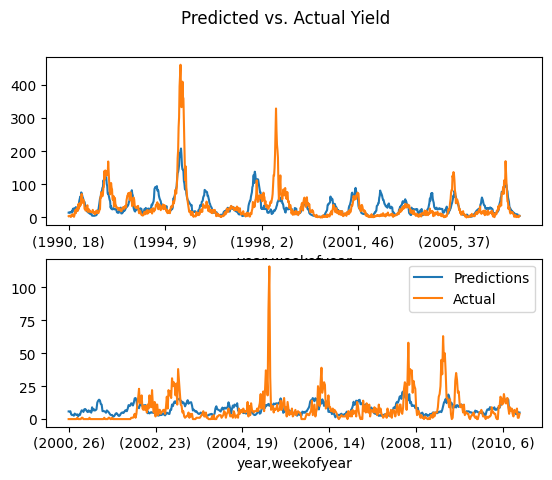

In [ ]:
figs, axes = plt.subplots(nrows=2, ncols=1)

# plot sj
sj_train['fitted'] = sj_best_final_model.predict(sj_train)
sj_train.fitted.plot(ax=axes[0], label="Predictions")
sj_train.total_cases.plot(ax=axes[0], label="Actual")

# plot iq
iq_train['fitted'] = iq_best_final_model.predict(iq_train)
iq_train.fitted.plot(ax=axes[1], label="Predictions")
iq_train.total_cases.plot(ax=axes[1], label="Actual")

plt.suptitle("Predicted vs. Actual Yield")
plt.legend()